# Check and preprocess

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# read the data
data = pd.read_csv('../data/new.csv', encoding='latin1')

# print the first 5 rows
print(data.head())

                                                 url            id  \
0  https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1  https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2  https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3  https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4  https://bj.lianjia.com/chengjiao/101086920653....  101086920653   

          Lng        Lat            Cid   tradeTime     DOM  followers  \
0  116.475489  40.019520  1111027376244  2016-08-09  1464.0        106   
1  116.453917  39.881534  1111027381879  2016-07-28   903.0        126   
2  116.561978  39.877145  1111040862969  2016-12-11  1271.0         48   
3  116.438010  40.076114  1111043185817  2016-09-30   965.0        138   
4  116.428392  39.886229  1111027381174  2016-08-28   927.0        286   

   totalPrice  price  ...  buildingType constructionTime renovationCondition  \
0       415.0  31680  ...           1.0             20

/var/folders/51/hrjbd3s95q7_fqgml710nj2r0000gn/T/ipykernel_32201/338064251.py:2: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/new.csv', encoding='latin1')


In [13]:
print(data.dtypes)

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object


In [9]:
missing_value = data.isnull().sum()

missing_value

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [14]:
data['constructionTime'] = pd.to_numeric(data['constructionTime'], errors='coerce')
data['house_age'] = 2017 - data['constructionTime']

In [15]:
scaler = StandardScaler()
data[['totalPrice', 'price']] = scaler.fit_transform(data[['totalPrice', 'price']])

In [16]:
data = pd.get_dummies(data, columns=['district'], drop_first=True)

In [17]:
data

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,0.285855,-0.545877,...,0,0,0,1,0,0,0,0,0,0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,0.979155,-0.004350,...,0,0,0,1,0,0,0,0,0,0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,2.950726,0.391108,...,0,0,0,1,0,0,0,0,0,0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,-0.223287,-0.982470,...,0,0,1,0,0,0,0,0,0,0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,0.186193,0.224127,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,0.004202,-1.057186,...,0,0,0,0,0,0,0,0,0,0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,-1.040947,-0.576924,...,0,0,0,0,0,0,0,0,0,0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,0.043200,-0.386588,...,0,0,0,0,0,0,0,0,0,0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,1.607458,-0.145444,...,0,0,0,0,0,0,0,0,0,0


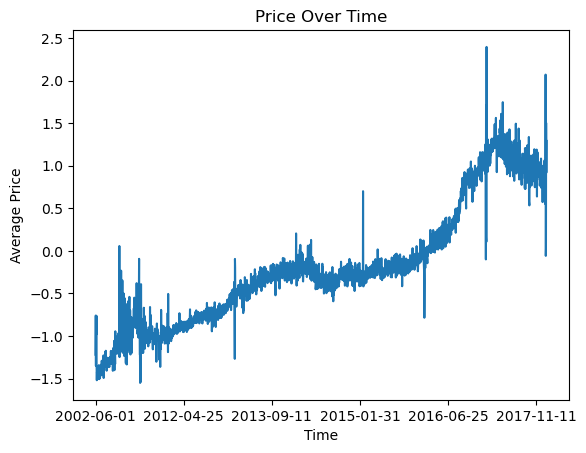

In [19]:
data.groupby('tradeTime')['price'].mean().plot()
plt.title('Price Over Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.show()

/Users/yulindong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


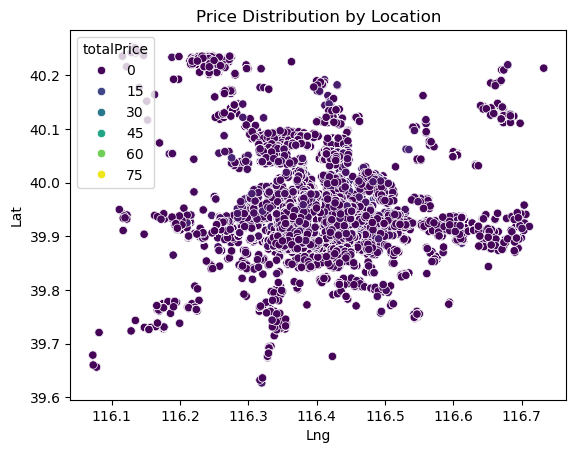

In [20]:
import seaborn as sns

sns.scatterplot(x='Lng', y='Lat', hue='totalPrice', data=data, palette='viridis')
plt.title('Price Distribution by Location')
plt.show()

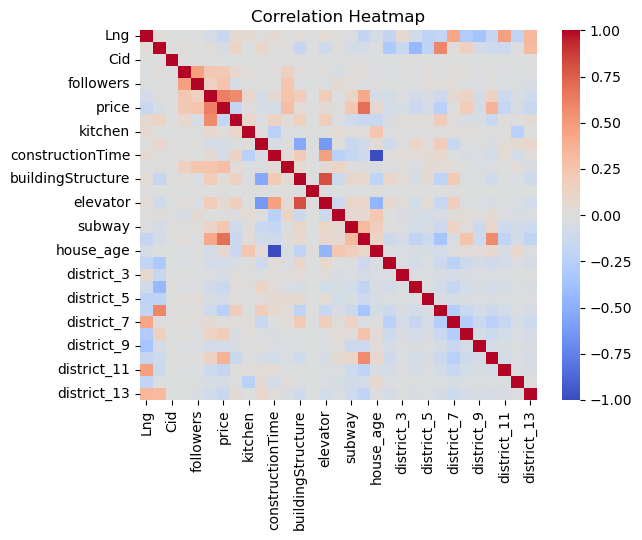

In [22]:
correlation = data.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()